In [101]:
# PREPARE DATASET
from sklearn import datasets
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [102]:
# TRAIN KNN MODEL
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []


for i in range(1, 9):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

In [103]:
# PREPARE KNN SCORE DATA
import pandas as pd

df = (
    pd.DataFrame(data = {
      'Testing Accuracy': test_scores,
      'Training Accuracy': train_scores,
      'Number of Neighbors': list(range(1, 9)),
    })
    .set_index('Number of Neighbors')
)

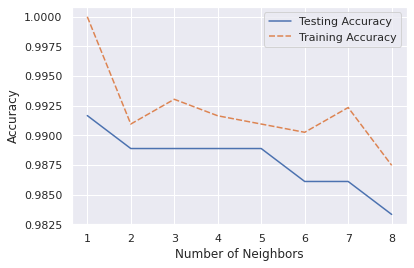

In [104]:
# DRAW KNN SCORE GRAPH
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=df).set_ylabel('Accuracy')

plt.show()

In [105]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import f1_score

kernels = ['linear', 'rbf', 'sigmoid']
scores = []

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    scores.append(f1_score(y_test, y_pred, average='micro'))

print(f'Based on highest f1 score, we choose {kernels[scores.index(max(scores))]}')

Based on highest f1 score, we choose rbf


In [106]:
# NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

bayes = GaussianNB()
bayes.fit(x_train, y_train)

y_pred = bayes.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  1,  0,  0,  0,  1,  2,  4,  0],
       [ 0,  3, 20,  1,  0,  0,  1,  0, 10,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  1,  1,  0],
       [ 1,  1,  0,  0, 35,  0,  1,  3,  2,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  2,  0,  3,  0,  2,  0,  1, 35,  0],
       [ 0,  0,  0,  4,  0,  1,  0,  1,  6, 15]])

<AxesSubplot:>

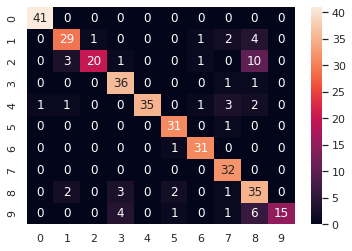

In [107]:
import seaborn as sns

sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:xlabel='Classifier', ylabel='Accuracy'>

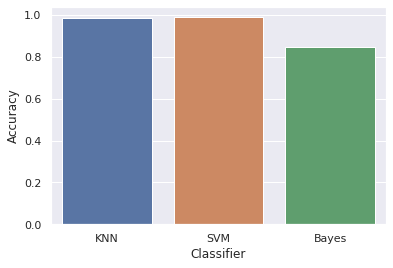

In [108]:
# COMPARE 3 MODELS
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train, y_train)
knn_score = knn.score(x_test, y_test)

svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
svm_score = svm.score(x_test, y_test)

bayes = GaussianNB()
bayes.fit(x_train, y_train)
bayes_score = bayes.score(x_test, y_test)

df = pd.DataFrame(data = {
  'Classifier': ['KNN', 'SVM', 'Bayes'],
  'Accuracy': [knn_score, svm_score, bayes_score],  
})

sns.barplot(data=df, x='Classifier', y='Accuracy')